# 2.Data Analysis

*Made by David Serrano for his Final Bachelor Thesis*


This file analyzes how many sequences have been labeled, how many detections and tracks we have found (and their labels) and how the detections Bounding Boxes and tracks are.

## 2.1. Environment Preparation

In [1]:
# Useful general imports
from google.colab import drive 

In [2]:
# mount the google drive folder to access to all the files in there
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Add the folder called utils that has all the custom modules in .py files
import sys
sys.path.append('/content/drive/MyDrive/TFG/utils')

In [4]:
from paths import PROJECT_ROOT, HDF5_FOLDER, JSON_FOLDER

## 2.2. Sequence and Detection Analysis

In the following block the labeled sequences are compared to the video files to realise which of the sequences are usable.

In [5]:
from os import walk

# All the files in .h5 and .json
all_HDF5 = []
all_labeled = []

# The .h5 files which do not have assigned a .json file and viceversa
missing_HDF5 = []
missing_labeled = []

# Adquire all the HDF5 names
for (dirpathHDF5, dirnamesHDF5, filenamesHDF5) in walk(HDF5_FOLDER):
    for fileHDF5 in filenamesHDF5:
        if fileHDF5.endswith('.h5'):
            all_HDF5.append(fileHDF5[:-3])

# Adquire all the .json names
for (dirpathJSON, dirnamesJSON, filenamesJSON) in walk(JSON_FOLDER):
    for fileJSON in filenamesJSON:
        if fileJSON.endswith('.h5.json'):
            all_labeled.append(fileJSON[:-8])

# Detect which files are missing
for filename in all_HDF5:
    if not filename in all_labeled:
        missing_labeled.append(filename)
    
for filename in all_labeled:
    if not filename in all_HDF5:
        missing_HDF5.append(filename)

# Display
if len(missing_HDF5)==0 and len(missing_labeled)==0:
    print('All the files have assigned a JSON file and a HDF5 file.')

elif len(missing_labeled)>0 and len(missing_HDF5)==0:
    print('All the JSON files have assigned a HDF5 file.')
    print('The following HDF5 files do not have assigned a JSON file:')
    for filename in missing_labeled:
        print('\t{}'.format(filename))

elif len(missing_labeled)==0 and len(missing_HDF5)>0:
    print('All the HDF5 files have assigned a JSON file.')
    print('The following JSON files do not have assigned a HDF5 file:')
    for filename in missing_HDF5:
        print('\t{}'.format(filename))

else:
    print('The following HDF5 files do not have assigned a JSON file:')
    for filename in missing_labeled:
        print('\t{}'.format(filename))
    print('The following JSON files do not have assigned a HDF5 file:')
    for filename in missing_HDF5:
        print('\t{}'.format(filename))

The following HDF5 files do not have assigned a JSON file:
	20180918.045_AEQ50
	20180925.017_AEQ11
	20181002.046_AEQ31
	20181002.047_AEQ31
The following JSON files do not have assigned a HDF5 file:
	20180906.036_AEQ10
	20180906.036_AEQ51


So we conclude that the usable sequences, which have both JSON and HDF5 files, are:

In [6]:
usable_sequences = ['20171207.039_AEQ11', '20171207.043_AEQ11',
                    '20180918.036_AEQ50', '20180918.038_AEQ50',
                    '20180918.040_AEQ50', '20180919.007_AEQ40',
                    '20180920.034_AEQ11', '20181002.028_AEQ20',
                    '20181004.038_AEQ10', '20181004.038_AEQ20',
                    '20181004.038_AEQ40', '20181004.046_AEQ20',
                    '20181004.046_AEQ40', '20181004.046_AEQ50']

To facilitate the visualization and operation of the filenames, the following blocks create two auxiliar functions which link every file name to a number and vice versa:

In [7]:
def seq2num(seq):
    """
    Link a string sequence filename to a number
    - seq:      string with the filename
    - return:   int
    """
    num = -1
    if '20171207.039_AEQ11' in seq:
        num = 1
    elif '20171207.043_AEQ11' in seq:
        num = 2
    elif '20180918.036_AEQ50' in seq:
        num = 3
    elif '20180918.038_AEQ50' in seq:
        num = 4
    elif '20180918.040_AEQ50' in seq:
        num = 5
    elif '20180919.007_AEQ40' in seq:
        num = 6
    elif '20180920.034_AEQ11' in seq:
        num = 7
    elif '20181002.028_AEQ20' in seq:
        num = 8
    elif '20181004.038_AEQ10' in seq:
        num = 9
    elif '20181004.038_AEQ20' in seq:
        num = 10
    elif '20181004.038_AEQ40' in seq:
        num = 11
    elif '20181004.046_AEQ20' in seq:
        num = 12
    elif '20181004.046_AEQ40' in seq:
        num = 13
    elif '20181004.046_AEQ50' in seq:
        num = 14
        
    return num

In [8]:
def num2seq(num):
    """
    Link every number between 1 and 14 to a sequence name
    - num:      int
    - return:   string with the linked filename
    """
    seq = ''
    if num == 1:
        seq = '20171207.039_AEQ11'
    elif num == 2:
        seq = '20171207.043_AEQ11'
    elif num == 3:
        seq ='20180918.036_AEQ50'
    elif num == 4:
        seq = '20180918.038_AEQ50'
    elif num == 5:
        seq = '20180918.040_AEQ50'
    elif num == 6:
        seq = '20180919.007_AEQ40'
    elif num == 7:
        seq = '20180920.034_AEQ11'
    elif num == 8:
        seq = '20181002.028_AEQ20'
    elif num == 9:
        seq = '20181004.038_AEQ10'
    elif num == 10:
        seq = '20181004.038_AEQ20'
    elif num == 11:
        seq = '20181004.038_AEQ40'
    elif num == 12:
        seq = '20181004.046_AEQ20'
    elif num == 13:
        seq = '20181004.046_AEQ40'
    elif num == 14:
        seq = '20181004.046_AEQ50'
    
    return seq 

Now, the following block counts all the detections stored. It is done:


1.   FRAME-BY-FRAME: counting ALL the detectins. This means that counts all the detections, even though they are from the same track.
2.   TRACK LEVEL: counting ONLY the tracks. This means that it does not matter how many detections or frames has a track that it will be counted as one.



In [9]:
# cusotm imports for this block
from JSONLoader import loadData

from os import walk

# Counters of all the TOTAL FRAMES with NoHotSpots, HotSpots and Anomalies
nNoHotSpot_fr = 0  # detection[6] == 0
nHotSpot_fr = 0    # detection[6] == 1
nAnomaly_fr = 0    # detection[6] == 2

# Counters of all the TOTAL TRACKS being NoHotSpots, HotSpots and Anomalies
nNoHotSpot_tr = 0  # detection[6] == 0
nHotSpot_tr = 0    # detection[6] == 1
nAnomaly_tr = 0    # detection[6] == 2

for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        if file.endswith('.h5') and file[:-3] in usable_sequences:

            # FRAME-BY-FRAME
            # Counter of frames with NoHotSpots of the actual file
            nNoHotSpot_fr_i = 0

            # Counter of frames with HotSpots of the actual file
            nHotSpot_fr_i = 0

            # Counter of frames with Anomalies of the actual file
            nAnomaly_fr_i = 0

            # TRACKS
            # Counter of tracks which are NoHotSpots of the actual file
            nNoHotSpot_tr_i = 0

            # Counter of tracks which are HotSpots of the actual file
            nHotSpot_tr_i = 0

            # Counter of tracks which are Anomalies of the actual file
            nAnomaly_tr_i = 0

            # Actual trackID
            actualTrackID = -1  # detection[1]
           

            nNoHotSpot_fr_i = 0
            nHotSpot_fr_i = 0
            nAnomaly_fr_i = 0
            nNoHotSpot_tr_i = 0
            nHotSpot_tr_i = 0
            nAnomaly_tr_i = 0

            try:
                filename = JSON_FOLDER + file + '.json'
                detections = loadData(filename)

                # FRAME-BY-FRAME
                for detection in detections:
                    if detection[6] == 0:
                        nNoHotSpot_fr_i = nNoHotSpot_fr_i + 1
                    elif detection[6] == 1:
                        nHotSpot_fr_i = nHotSpot_fr_i + 1
                    elif detection[6] == 2:
                        nAnomaly_fr_i = nAnomaly_fr_i + 1

                # TRACKS
                for detection in detections:
                    if actualTrackID != detection[1]:                           
                        if detection[6] == 0:
                            nNoHotSpot_tr_i = nNoHotSpot_tr_i + 1
                        elif detection[6] == 1:
                            nHotSpot_tr_i = nHotSpot_tr_i + 1
                        elif detection[6] == 2:
                            nAnomaly_tr_i = nAnomaly_tr_i + 1
                    
                    actualTrackID = detection[1]
        
                print('{} ({})'.format(file, seq2num(file)))

                print('\tFRAME-BY-FRAME:')
                print('\tNumber of NoHotSpots: {}'.format(nNoHotSpot_fr_i))
                print('\tNumber of HotSpots: {}'.format(nHotSpot_fr_i))
                print('\tNumber of Anomalies: {}'.format(nAnomaly_fr_i))

                print('\tTRACK:')
                print('\tNumber of NoHotSpots: {}'.format(nNoHotSpot_tr_i))
                print('\tNumber of HotSpots: {}'.format(nHotSpot_tr_i))
                print('\tNumber of Anomalies: {}'.format(nAnomaly_tr_i))

                nNoHotSpot_fr = nNoHotSpot_fr + nNoHotSpot_fr_i
                nHotSpot_fr = nHotSpot_fr + nHotSpot_fr_i
                nAnomaly_fr = nAnomaly_fr + nAnomaly_fr_i

                nNoHotSpot_tr = nNoHotSpot_tr + nNoHotSpot_tr_i
                nHotSpot_tr = nHotSpot_tr + nHotSpot_tr_i
                nAnomaly_tr = nAnomaly_tr + nAnomaly_tr_i

            except Exception as e:
                print('Error opening file')
                print(e)

print("==============================================================")
print("==============================================================")
print('Number of the TOTAL FRAME detections as NoHotSpots: {}'.format(nNoHotSpot_fr))
print('Number of the TOTAL FRAME detections as HotSpots: {}'.format(nHotSpot_fr))
print('Number of the TOTAL FRAME detections as Anomalies: {}'.format(nAnomaly_fr))
print("--------------------------------------------------------------")
print('Number of the TOTAL TRACKS as NoHotSpots: {}'.format(nNoHotSpot_tr))
print('Number of the TOTAL TRACKS detections as HotSpots: {}'.format(nHotSpot_tr))
print('Number of the TOTAL TRAKCS detections as Anomalies: {}'.format(nAnomaly_tr))
print("==============================================================")
print('Number of the TOTAL FRAME DETECTIONS: {}'.format(nNoHotSpot_fr+nHotSpot_fr+nAnomaly_fr))
print("--------------------------------------------------------------")
print('Number of the TOTAL TRACKS DETECTED: {}'.format(nNoHotSpot_tr+nHotSpot_tr+nAnomaly_tr))

20171207.039_AEQ11.h5 (1)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 5473
	Number of HotSpots: 0
	Number of Anomalies: 191
	TRACK:
	Number of NoHotSpots: 49
	Number of HotSpots: 0
	Number of Anomalies: 3
20171207.043_AEQ11.h5 (2)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 7887
	Number of HotSpots: 0
	Number of Anomalies: 279
	TRACK:
	Number of NoHotSpots: 74
	Number of HotSpots: 0
	Number of Anomalies: 3
20180918.036_AEQ50.h5 (3)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 8592
	Number of HotSpots: 673
	Number of Anomalies: 877
	TRACK:
	Number of NoHotSpots: 56
	Number of HotSpots: 3
	Number of Anomalies: 8
20180918.038_AEQ50.h5 (4)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 7325
	Number of HotSpots: 433
	Number of Anomalies: 829
	TRACK:
	Number of NoHotSpots: 62
	Number of HotSpots: 2
	Number of Anomalies: 6
20180918.040_AEQ50.h5 (5)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 6702
	Number of HotSpots: 255
	Number of Anomalies: 398
	TRACK:
	Number of NoHotSpots: 83
	Number of HotSpots: 1
	Number of An

## 2.3. Bounding Box Analysis


The following block makes a study of the Bounding Boxes of the stored detections for later on crop them. The code returns:


*   Histogram with the maximum side length of the Bounding Boxes
*   2D-Histogram with the maximum side length of the Bounding Boxes and the form factor (minimum side length/maximum side length)



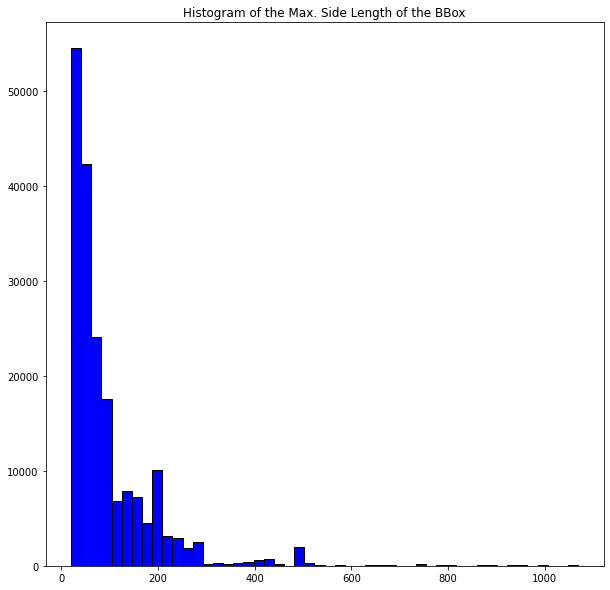

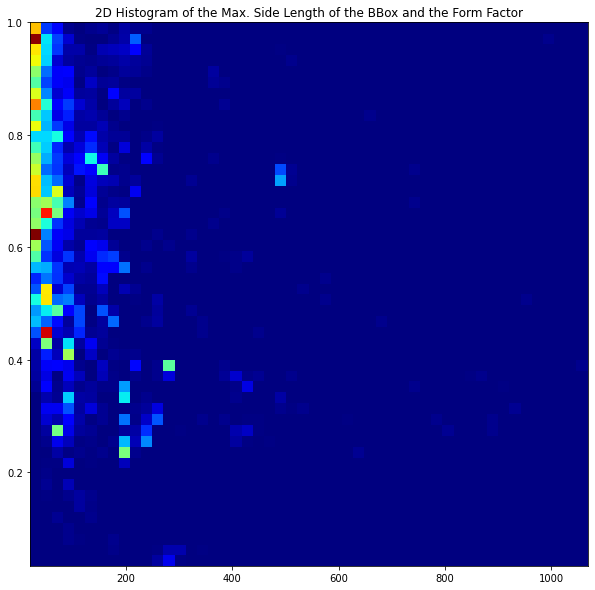

In [ ]:
from os import walk
import matplotlib.pyplot as plt

max_len = []
form_factor = []
for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        if file.endswith('.h5') and file[:-3] in usable_sequences:

            try:
                filename = JSON_FOLDER + file + '.json'
                detections = loadData(filename)

                for detection in detections:
                    xdif = detection[4] - detection[2]
                    ydif = detection[5] - detection[3]
                    max_len.append(max(xdif, ydif))
                    if xdif < ydif:
                        form_factor.append(xdif/ydif)
                    else:
                        form_factor.append(ydif/xdif)
                
            except Exception as e:
                print('Error opening file')
                print(e)

plt.figure(figsize=(10,10))
plt.title('Histogram of the Max. Side Length of the BBox')                    
_ = plt.hist(max_len, bins=50, color = "b", ec="black")
plt.show()

plt.figure(figsize=(10,10))
plt.title('2D Histogram of the Max. Side Length of the BBox and the Form Factor')  
_ = plt.hist2d(max_len, form_factor, bins=50, cmap=plt.cm.jet)
plt.show()

In light of the histograms achieved, we can conclude that almost all the BBoxes have a maximum side length of at most 250 pixels. We can also conclude that all the detections have a reduced form factor, in other words, both sides are usually similar.

Later on we will crop the detections, so the following block analyzes and returns the percentage of detections that fit within a square of side length *MAX_SQUARE_LEN*.

Taking into account other factors such as the input size of some of the pretrained Neural Networks, we will use a square of 224 pixles of side length.

We can observe that 92.32% fit within a 224 pixels square, with is a reasonable result.

In [ ]:
MAX_SQUARE_LEN = 224

from os import walk

counter = 0
total_counter = 0
for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        if file.endswith('.h5') and file[:-3] in usable_sequences:

            try:
                filename = JSON_FOLDER + file + '.json'
                detections = loadData(filename)

                for detection in detections:
                    total_counter = total_counter + 1
                    xdif = detection[4] - detection[2]
                    ydif = detection[5] - detection[3]
                    if xdif<MAX_SQUARE_LEN and ydif<MAX_SQUARE_LEN:
                        counter = counter + 1
                
            except Exception as e:
                print('Error opening file')
                print(e)

print('The {:.2f}% of the BBoxes fit within a {} pixels square'.format((counter/total_counter)*100,
                                                                       MAX_SQUARE_LEN))

The 92.32% of the BBoxes fit within a 224 pixels square


## 2.4. Track Analysis



This section analyses the tracks of the stored detections with:


*   Histogram of the frame length of the tracks
*   Histogram of the maximum displacement of the Bounding Boxes of the same track. (Euclidean Distance)
*   Histogram of the maximum change of the area of the Bounding Boxes of the same track

The analysis is first done differentiating amongst labels to know if there exists some specific characteristics that can be used later on, and then, all the labels mixed up to have a general view.

Above the histograms, the means of all the sets of values are computed.



In [ ]:
# Custom imports
from JSONLoader import loadData

import math
import numpy as np

# List of each characteristic to analyze for each label
trackLength_NHS = []
trackLength_HS = []
trackLength_AN = []

distances_NHS = []
distances_HS = []
distances_AN = []

areas_NHS = []
areas_HS = []
areas_AN = []

for seq in usable_sequences:
    print('Studying sequence {}({})'.format(seq, seq2num(seq)))

    # Detections of each sequence of the list
    detections_i = loadData(JSON_FOLDER + seq + '.h5.json')

    # List with all the detections with the same trackID
    sameTrackID_detections = []
    track_i_length = 0
    trackID = 0

    # Create a list with the actual track detections
    # When the track changes into the next one, calculate all the
    # characteristics (frame length, centroid displacement, change of size)
    for d in detections_i:
        if d[1] == trackID:
            label = d[6]
            track_i_length = track_i_length + 1
            BBox_Xcentroid = ((d[4] - d[2]) / 2) + d[2]
            BBox_Ycentroid = ((d[5] - d[3]) / 2) + d[3]
            BBox_area = (d[4] - d[2]) * (d[5] - d[3])
            sameTrackID_detections.append(
                [BBox_Xcentroid, BBox_Ycentroid, BBox_area])

        else:
            all_vs_all_distance = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
            all_vs_all_area = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
            i = 0
            for c0 in sameTrackID_detections:
                j = 0
                for c1 in sameTrackID_detections:
                    distance_diff = math.sqrt((c0[0] - c1[0]) ** 2 + (c0[1] - c1[1]) ** 2)
                    area_diff =  abs(c0[2] - c1[2])
                    all_vs_all_distance[i,j] = distance_diff
                    all_vs_all_area[i,j] = area_diff
                    j = j + 1
                i = i + 1

            max_distance = np.max(all_vs_all_distance)
            max_area = np.max(all_vs_all_area)

            if label == 0:
                distances_NHS.append(max_distance)
                areas_NHS.append(max_area)
                trackLength_NHS.append(track_i_length)
            
            elif label == 1:
                distances_HS.append(max_distance)
                areas_HS.append(max_area)
                trackLength_HS.append(track_i_length)

            elif label == 2:
                distances_AN.append(max_distance)
                areas_AN.append(max_area)
                trackLength_AN.append(track_i_length)

            track_i_length = 1
            trackID = d[1]
            sameTrackID_detections = []
            BBox_Xcentroid = ((d[4] - d[2]) / 2) + d[2]
            BBox_Ycentroid = ((d[5] - d[3]) / 2) + d[3]
            BBox_area = (d[4] - d[2]) * (d[5] - d[3])
            sameTrackID_detections.append(
                [BBox_Xcentroid, BBox_Ycentroid, BBox_area])

    # Add the final track detection
    track_i_length = 0
    all_vs_all_distance = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
    all_vs_all_area = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
    i = 0
    for c0 in sameTrackID_detections:
        j = 0
        for c1 in sameTrackID_detections:
            distance_diff = math.sqrt((c0[0] - c1[0]) ** 2 + (c0[1] - c1[1]) ** 2)
            area_diff =  abs(c0[2] - c1[2])
            all_vs_all_distance[i,j] = distance_diff
            all_vs_all_area[i,j] = area_diff
            j = j + 1
        i = i + 1

    max_distance = np.max(all_vs_all_distance)
    max_area = np.max(all_vs_all_area)

    if label == 0:
        distances_NHS.append(max_distance)
        areas_NHS.append(max_area)
        trackLength_NHS.append(track_i_length)
    
    elif label == 1:
        distances_HS.append(max_distance)
        areas_HS.append(max_area)
        trackLength_HS.append(track_i_length)

    elif label == 2:
        distances_AN.append(max_distance)
        areas_AN.append(max_area)
        trackLength_AN.append(track_i_length)

Studying sequence 20171207.039_AEQ11(1)
Studying sequence 20171207.043_AEQ11(2)
Studying sequence 20180918.036_AEQ50(3)
Studying sequence 20180918.038_AEQ50(4)
Studying sequence 20180918.040_AEQ50(5)
Studying sequence 20180919.007_AEQ40(6)
Studying sequence 20180920.034_AEQ11(7)
Studying sequence 20181002.028_AEQ20(8)
Studying sequence 20181004.038_AEQ10(9)
Studying sequence 20181004.038_AEQ20(10)
Studying sequence 20181004.038_AEQ40(11)
Studying sequence 20181004.046_AEQ20(12)
Studying sequence 20181004.046_AEQ40(13)
Studying sequence 20181004.046_AEQ50(14)


######### TRACK LENGTH #########



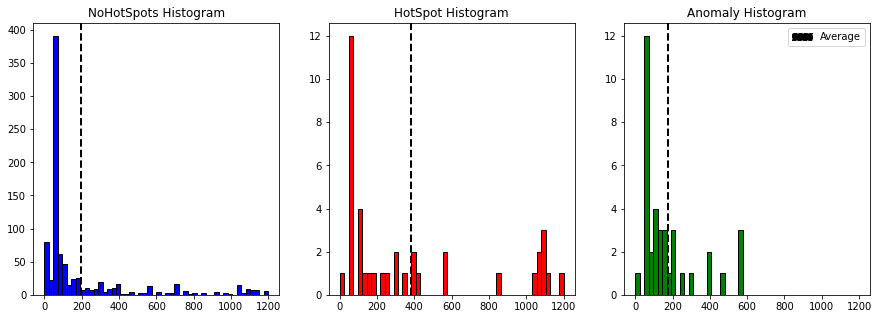

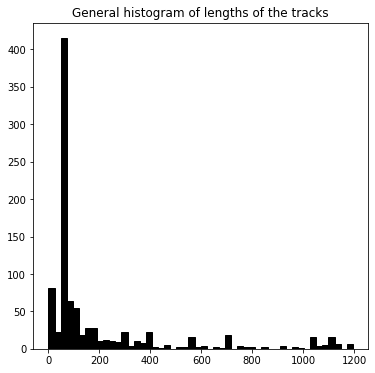


######### CENTROID DISPLACEMENT #########



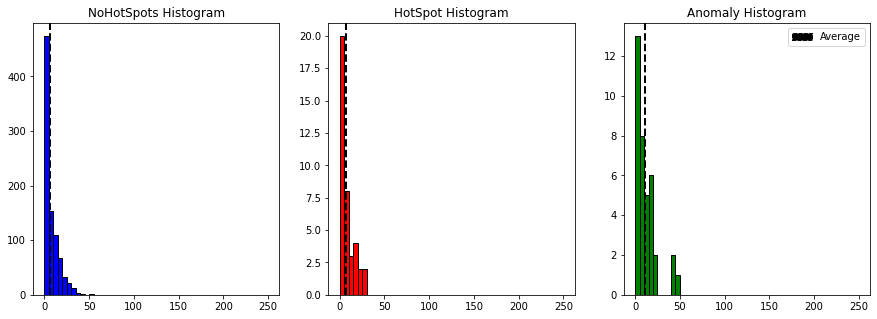

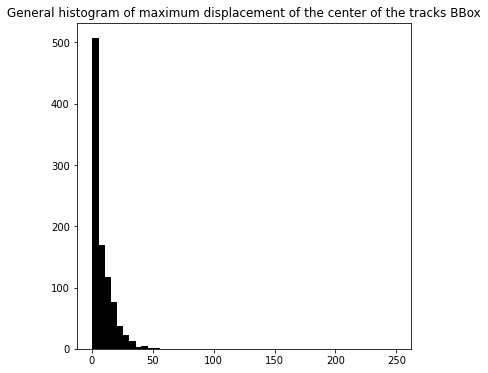


######### SIZE CHANGES #########



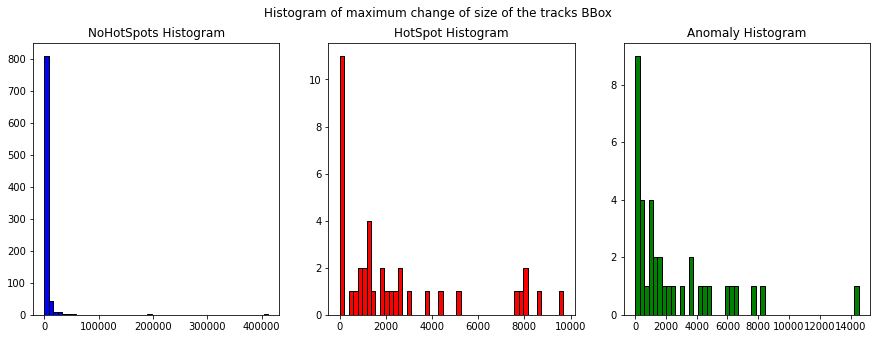

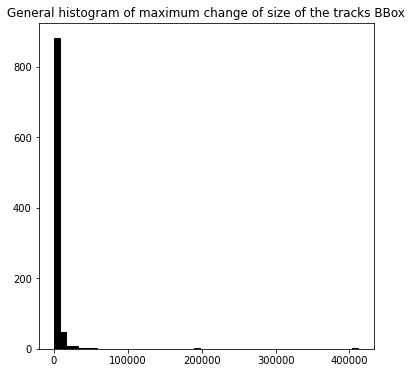


######### MEAN CALCULATIONS #########

NHS:	Mean TRACK LENGTH: 193.63 frames
HS:	Mean TRACK LENGTH: 381.28 frames
AN:	Mean TRACK LENGTH: 173.41 frames
GENERAL: Mean TRACK LENGTH: 200.54 frames

NHS:	Mean DISPLACEMENT: 6.81 pixels
HS:	Mean DISPLACEMENT: 7.52 pixels
NHS:	Mean DISPLACEMENT: 10.88 pixels
GENERAL: Mean DISPLACEMENT: 7.00 pixels

NHS:	Mean SIZE CHANGE: 2855.02 pixels2
NHS:	Mean CHANGE OF THE SIDES OF THE BBOX: 53.43 pixels
HS:	Mean SIZE CHANGE: 2394.69 pixels2
HS:	Mean CHANGE OF THE SIDES OF THE BBOX: 48.94 pixels
AN:	Mean SIZE CHANGE: 2461.46 pixels2
AN:	Mean CHANGE OF THE SIDES OF THE BBOX: 49.61 pixels
GENERAL: Mean SIZE CHANGE: 2820.83 pixels2
GENERAL: Mean CHANGE OF THE SIDES OF THE BBOX: 53.11 pixels


In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Plot
# TRACK LENGTH
print('######### TRACK LENGTH #########\n')

f,a = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
histnames = [trackLength_NHS, trackLength_HS, trackLength_AN]
titles = ['NoHotSpots Histogram', 'HotSpot Histogram', 'Anomaly Histogram']
colors = ['b', 'r', 'g']

for i in range(len(a)):
    a[i].hist(histnames[i], bins=50, color = colors[i], ec="black", range=[0,1200])
    a[i].set_title(titles[i])
#_ = f.suptitle('Histogram of frame-lengths of the tracks')

a[0].axvline(np.array(trackLength_NHS).mean(), color='k', linestyle='dashed', linewidth=2)
a[1].axvline(np.array(trackLength_HS).mean(), color='k', linestyle='dashed', linewidth=2)
a[2].axvline(np.array(trackLength_AN).mean(), color='k', linestyle='dashed', linewidth=2)
patch = mpatches.Patch(linestyle='dashed', color='black', label='Average', )
a[2].legend(handles=[patch])
plt.show()


plt.figure(figsize=(6,6))
plt.title('General histogram of lengths of the tracks')                    
_ = plt.hist(trackLength_NHS + trackLength_HS + trackLength_AN, bins=50, color = "black", ec="black")
plt.show()

# CENTRIOD DISPLACEMENT
print('\n######### CENTROID DISPLACEMENT #########\n')

f,a = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
histnames = [distances_NHS, distances_HS, distances_AN]
titles = ['NoHotSpots Histogram', 'HotSpot Histogram', 'Anomaly Histogram']
colors = ['b', 'r', 'g']

for i in range(len(a)):
    a[i].hist(histnames[i], bins=50, color = colors[i], ec="black", range=[0,250])
    a[i].set_title(titles[i])
#_ = f.suptitle('Histogram of maximum displacement of the center of the tracks BBox')
a[0].axvline(np.array(distances_NHS).mean(), color='k', linestyle='dashed', linewidth=2)
a[1].axvline(np.array(distances_HS).mean(), color='k', linestyle='dashed', linewidth=2)
a[2].axvline(np.array(distances_AN).mean(), color='k', linestyle='dashed', linewidth=2)
a[2].legend(handles=[patch])
plt.show()

plt.figure(figsize=(6,6))
plt.title('General histogram of maximum displacement of the center of the tracks BBox')                    
_ = plt.hist(distances_NHS + distances_HS + distances_AN, bins=50, color = "black", ec="black", range=[0,250])
plt.show()

# SIZE CHANGES
print('\n######### SIZE CHANGES #########\n')

f,a = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
histnames = [areas_NHS, areas_HS, areas_AN]
titles = ['NoHotSpots Histogram', 'HotSpot Histogram', 'Anomaly Histogram']
colors = ['b', 'r', 'g']

for i in range(len(a)):
    a[i].hist(histnames[i], bins=50, color = colors[i], ec="black")
    a[i].set_title(titles[i])
_ = f.suptitle('Histogram of maximum change of size of the tracks BBox')
plt.show()

plt.figure(figsize=(6,6))
plt.title('General histogram of maximum change of size of the tracks BBox')                    
_ = plt.hist(areas_NHS + areas_HS + areas_AN, bins=50, color = "black", ec="black")
plt.show()

# MEAN CALCULATIONS
print('\n######### MEAN CALCULATIONS #########\n')

print('NHS:\tMean TRACK LENGTH: {:.2f} frames'.format((sum(trackLength_NHS)/len(trackLength_NHS))))
print('HS:\tMean TRACK LENGTH: {:.2f} frames'.format((sum(trackLength_HS)/len(trackLength_HS))))
print('AN:\tMean TRACK LENGTH: {:.2f} frames'.format((sum(trackLength_AN)/len(trackLength_AN))))
print('GENERAL: Mean TRACK LENGTH: {:.2f} frames\n'.format((sum(trackLength_NHS+trackLength_HS+trackLength_AN)/len(trackLength_NHS+trackLength_HS+trackLength_AN))))

print('NHS:\tMean DISPLACEMENT: {:.2f} pixels'.format((sum(distances_NHS)/len(distances_NHS))))
print('HS:\tMean DISPLACEMENT: {:.2f} pixels'.format((sum(distances_HS)/len(distances_HS))))
print('NHS:\tMean DISPLACEMENT: {:.2f} pixels'.format((sum(distances_AN)/len(distances_AN))))
print('GENERAL: Mean DISPLACEMENT: {:.2f} pixels\n'.format((sum(distances_NHS+distances_HS+distances_AN)/len(distances_NHS+distances_HS+distances_AN))))

print('NHS:\tMean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_NHS)/len(areas_NHS))))
print('NHS:\tMean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_NHS)/len(areas_NHS))))

print('HS:\tMean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_HS)/len(areas_HS))))
print('HS:\tMean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_HS)/len(areas_HS))))

print('AN:\tMean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_AN)/len(areas_AN))))
print('AN:\tMean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_AN)/len(areas_AN))))

print('GENERAL: Mean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_NHS+areas_HS+areas_AN)/len(areas_NHS+areas_HS+areas_AN))))
print('GENERAL: Mean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_NHS+areas_HS+areas_AN)/len(areas_NHS+areas_HS+areas_AN))))


In light of the histograms achieved, we can conclude that more or less all the tracks of different labels perform the same.

The tracks last around 200 frames, but in this case the HotSpots are often longer than the other two labels (around 400 frames).

The tracks have very low movement, so having less frames rather than all the track would be a good idea since the images will be from the same part of the image. In other words, making a subsampling or only taking a few frames of the track could be a good idea.

The sizes of the BBoxes change a little bit. However, since we already know that 92% of the BBoxes fit in squares of 224, we do not have to worry.